# Predicting Web Traffic

### Using a time-series model to analyze future web traffic

In [74]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
#import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [93]:
xls_file = pd.read_excel('Origami_Data.xlsx',sheetname='Online Traffic',skiprows=1,index_col='Month')
#traffic = xls_file.parse('Online Traffic')
print "Data loaded successfully!"


Data loaded successfully!


In [94]:
# Convert to a time-series object
traffic = xls_file
traffic.columns = ['visits']
#ts = traffic['Number of Visits'] 

print list(traffic.columns.values)


['visits']


### Let's plot the data to make sure it resembles the excel graph

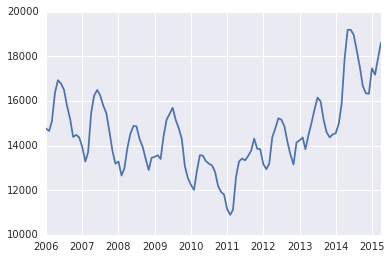

In [95]:
plt.plot(ts)

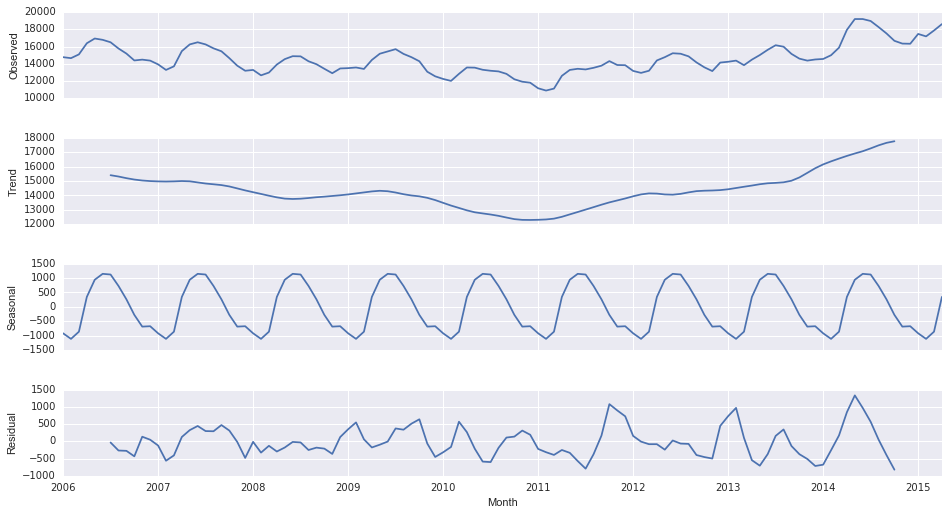

In [96]:
decomposition = seasonal_decompose(traffic['visits'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


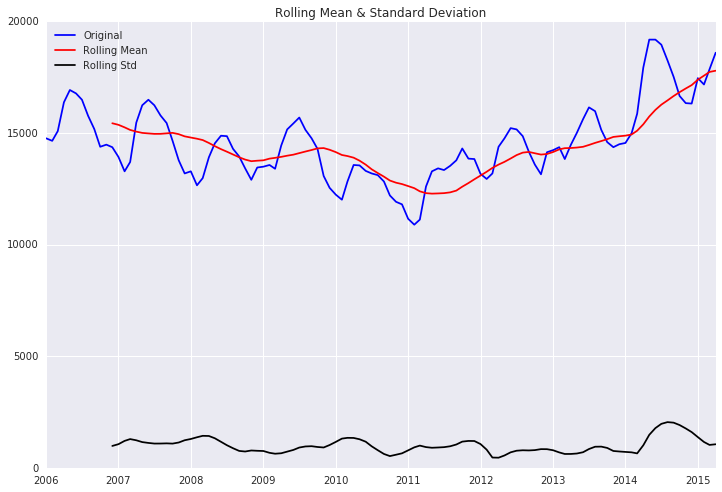

Results of Dickey-Fuller Test:
Test Statistic                 -0.683518
p-value                         0.850973
#Lags Used                     12.000000
Number of Observations Used    99.000000
Critical Value (5%)            -2.891208
Critical Value (1%)            -3.498198
Critical Value (10%)           -2.582596
dtype: float64


In [97]:
test_stationarity(traffic.visits)

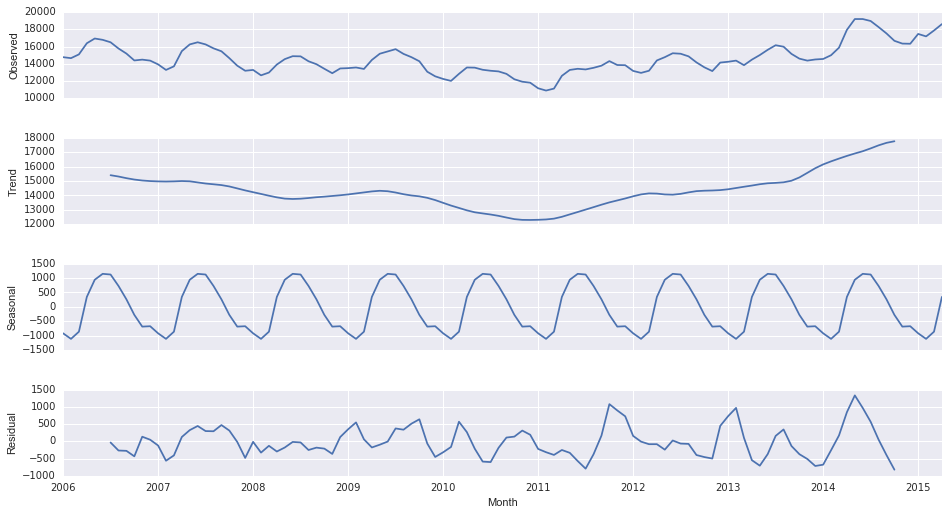

In [98]:
decomposition = seasonal_decompose(traffic.visits, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [99]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


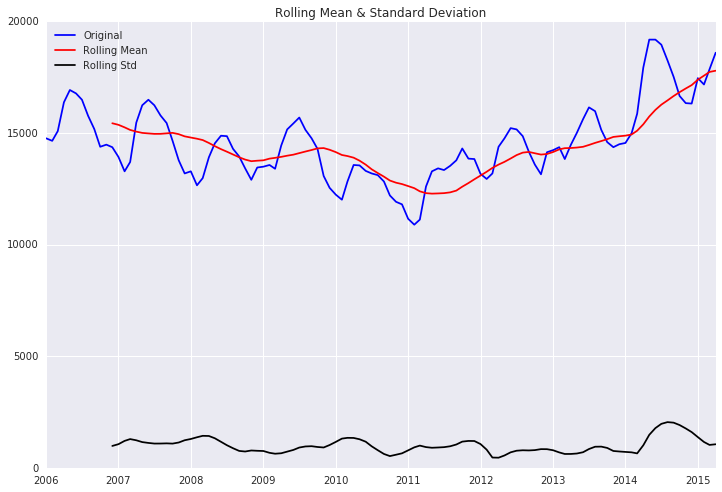

Results of Dickey-Fuller Test:
Test Statistic                 -0.683518
p-value                         0.850973
#Lags Used                     12.000000
Number of Observations Used    99.000000
Critical Value (5%)            -2.891208
Critical Value (1%)            -3.498198
Critical Value (10%)           -2.582596
dtype: float64


In [100]:
test_stationarity(traffic.visits)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


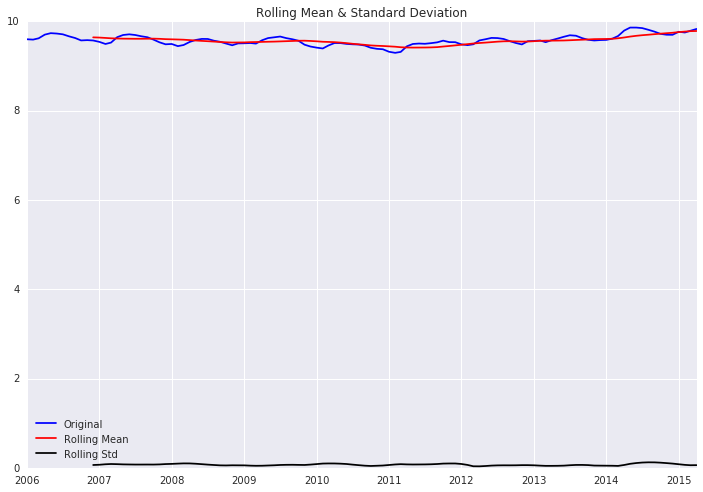

Results of Dickey-Fuller Test:
Test Statistic                 -0.819514
p-value                         0.813323
#Lags Used                     12.000000
Number of Observations Used    99.000000
Critical Value (5%)            -2.891208
Critical Value (1%)            -3.498198
Critical Value (10%)           -2.582596
dtype: float64


In [101]:
traffic.visits_log= traffic.visits.apply(lambda x: np.log(x))  
test_stationarity(traffic.visits_log)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


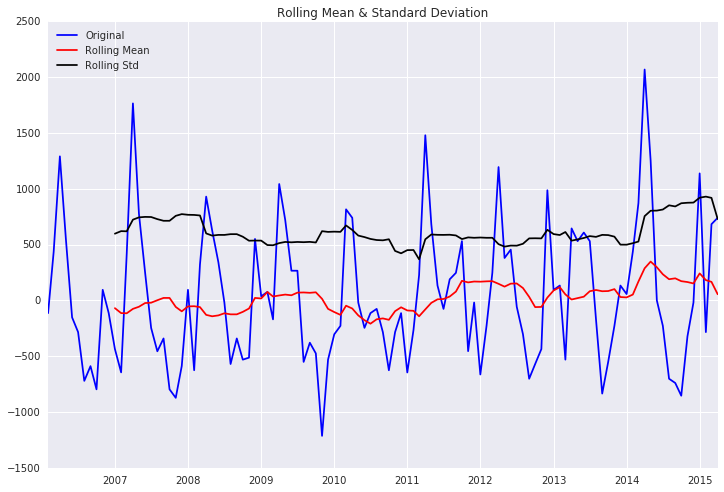

Results of Dickey-Fuller Test:
Test Statistic                 -2.360815
p-value                         0.153103
#Lags Used                     11.000000
Number of Observations Used    99.000000
Critical Value (5%)            -2.891208
Critical Value (1%)            -3.498198
Critical Value (10%)           -2.582596
dtype: float64


In [102]:
traffic['first_difference'] = traffic.visits - traffic.visits.shift(1)  
test_stationarity(traffic.first_difference.dropna(inplace=False))

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


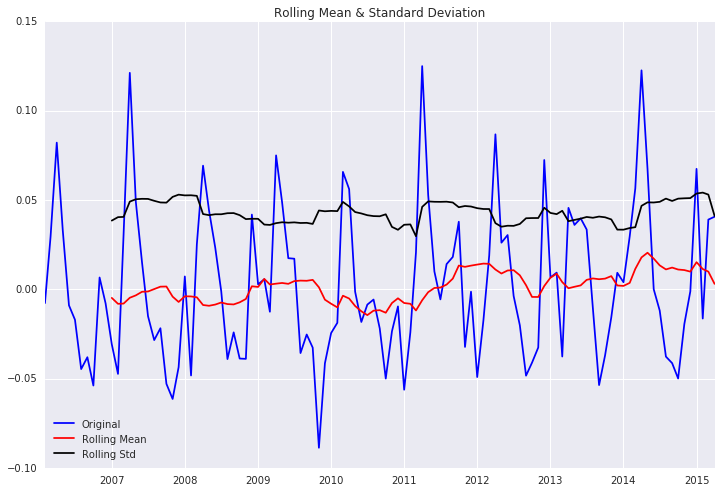

Results of Dickey-Fuller Test:
Test Statistic                 -2.409892
p-value                         0.138964
#Lags Used                     11.000000
Number of Observations Used    99.000000
Critical Value (5%)            -2.891208
Critical Value (1%)            -3.498198
Critical Value (10%)           -2.582596
dtype: float64


In [103]:
traffic['log_first_difference'] = traffic.visits_log - traffic.visits_log.shift(1)  
test_stationarity(traffic.log_first_difference.dropna(inplace=False))

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


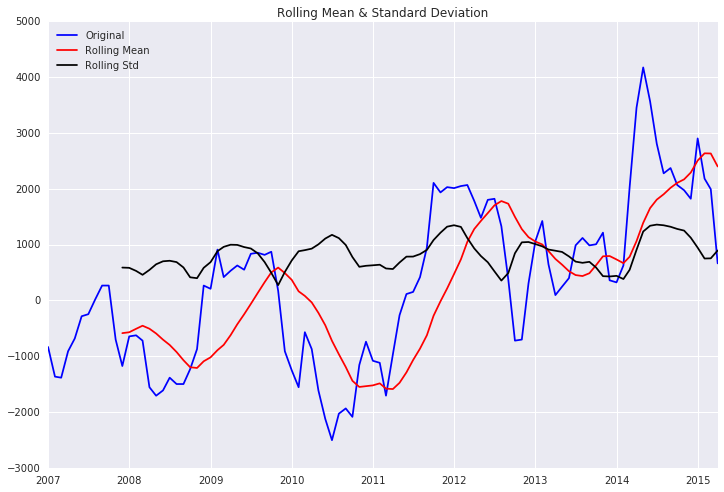

Results of Dickey-Fuller Test:
Test Statistic                 -0.957752
p-value                         0.768360
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (5%)            -2.895382
Critical Value (1%)            -3.507853
Critical Value (10%)           -2.584824
dtype: float64


In [104]:
traffic['seasonal_difference'] = traffic.visits - traffic.visits.shift(12)  
test_stationarity(traffic.seasonal_difference.dropna(inplace=False))



C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


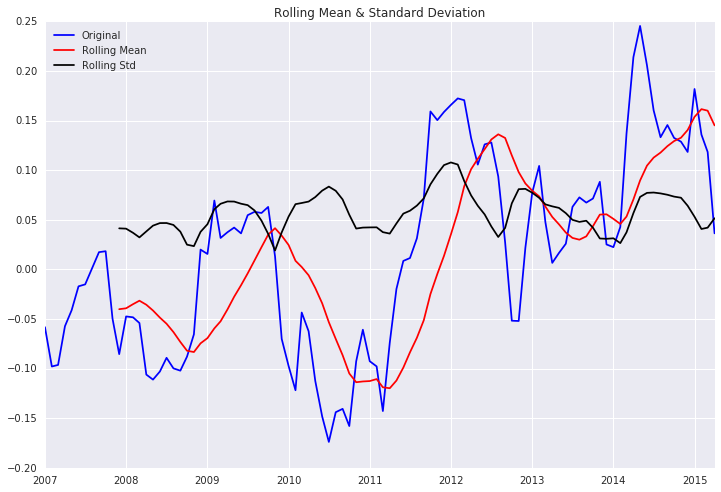

Results of Dickey-Fuller Test:
Test Statistic                 -1.114854
p-value                         0.709112
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (5%)            -2.895382
Critical Value (1%)            -3.507853
Critical Value (10%)           -2.584824
dtype: float64


In [105]:
traffic['log_seasonal_difference'] = traffic.visits_log - traffic.visits_log.shift(12)  
test_stationarity(traffic.log_seasonal_difference.dropna(inplace=False))

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


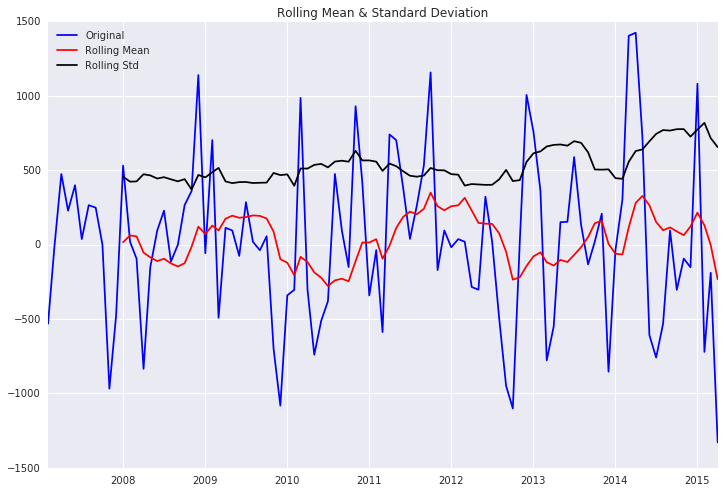

Results of Dickey-Fuller Test:
Test Statistic                 -4.177172
p-value                         0.000720
#Lags Used                     11.000000
Number of Observations Used    87.000000
Critical Value (5%)            -2.895382
Critical Value (1%)            -3.507853
Critical Value (10%)           -2.584824
dtype: float64


In [106]:
traffic['seasonal_first_difference'] = traffic.first_difference - traffic.first_difference.shift(12)  
test_stationarity(traffic.seasonal_first_difference.dropna(inplace=False))

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


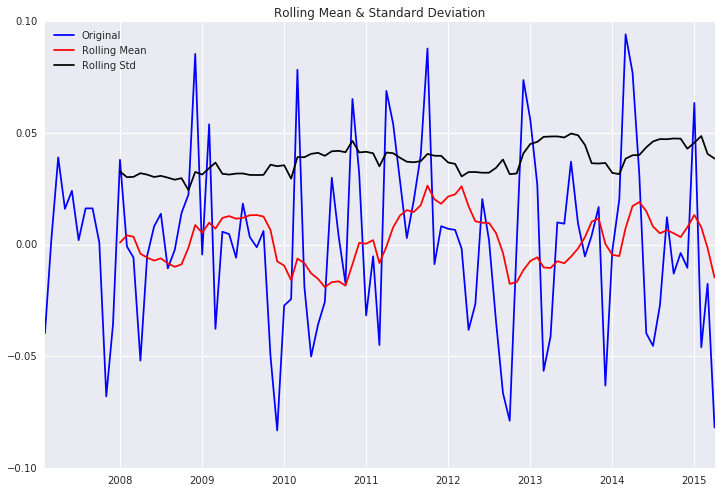

Results of Dickey-Fuller Test:
Test Statistic                 -4.354377
p-value                         0.000357
#Lags Used                     11.000000
Number of Observations Used    87.000000
Critical Value (5%)            -2.895382
Critical Value (1%)            -3.507853
Critical Value (10%)           -2.584824
dtype: float64


In [107]:
traffic['log_seasonal_first_difference'] = traffic.log_first_difference - traffic.log_first_difference.shift(12)  
test_stationarity(traffic.log_seasonal_first_difference.dropna(inplace=False))

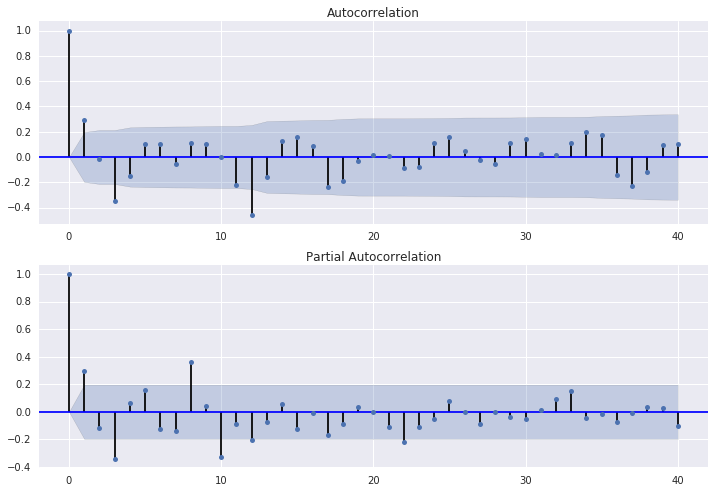

In [108]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(traffic.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(traffic.seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [79]:
import statsmodels
mod = statsmodels.tsa.statespace.SARIMAX(df.riders, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print results.summary()

AttributeError: 'module' object has no attribute 'statespace'

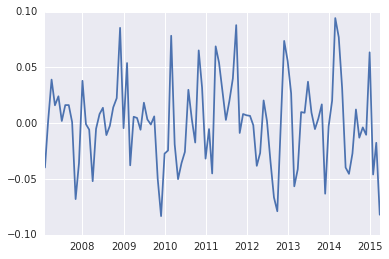

In [109]:
plt.plot(traffic['log_seasonal_first_difference'])

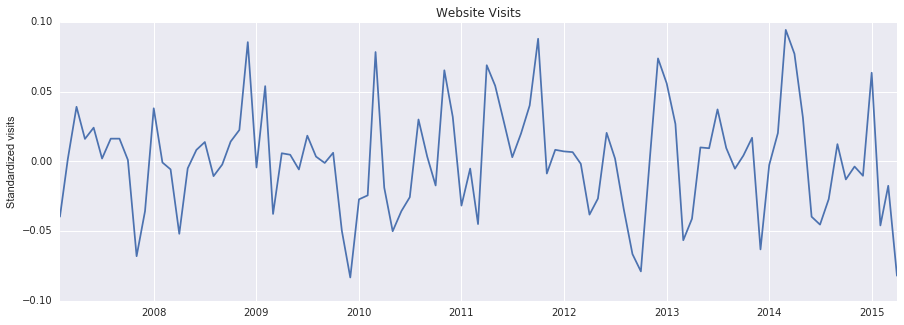

In [129]:
#pip.main(['install', 'pyflux'])



import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 



plt.figure(figsize=(15,5))
plt.plot(traffic.log_seasonal_first_difference)
plt.ylabel('Standardized visits')
plt.title('Website Visits');

In [141]:
list(traffic.columns.values)

['visits',
 'first_difference',
 'log_first_difference',
 'seasonal_difference',
 'log_seasonal_difference',
 'seasonal_first_difference',
 'log_seasonal_first_difference']

In [130]:
model = pf.ARIMA(data=traffic,ar=4,ma=4,integ=0, target = 'log_seasonal_first_difference')

In [131]:
model = pf.ARIMA(data=traffic,ar=4,ma=4,integ=0, target = 'visits')

In [150]:
model = pf.ARIMA(data=traffic,ar=4,ma=4,integ=0, target = 'visits')

In [151]:
x = model.fit("MLE")
x.summary()

ARIMA(4,0,4)                                                                                              
======================================================= ==================================================
Dependent Variable: visits                              Method: MLE                                       
Start Date: 2006-05-01 00:00:00                         Log Likelihood: -840.3765                         
End Date: 2015-04-01 00:00:00                           AIC: 1700.7529                                    
Number of observations: 108                             BIC: 1727.5743                                    
Parameter                                Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 14562.2046 3104.4447  4.6908   0.0      (8477.4931 | 20646.9161) 
AR(1)                                

In [120]:
model.plot_z(indices=range(1,9))

AttributeError: 'ARIMA' object has no attribute 'plot_z'

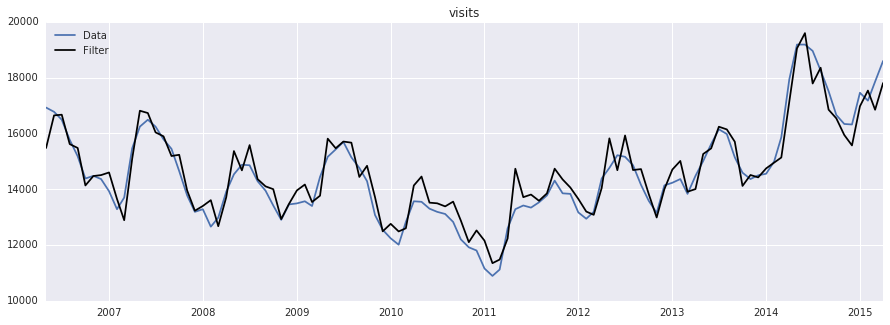

In [133]:
model.plot_fit(figsize=(15,5))

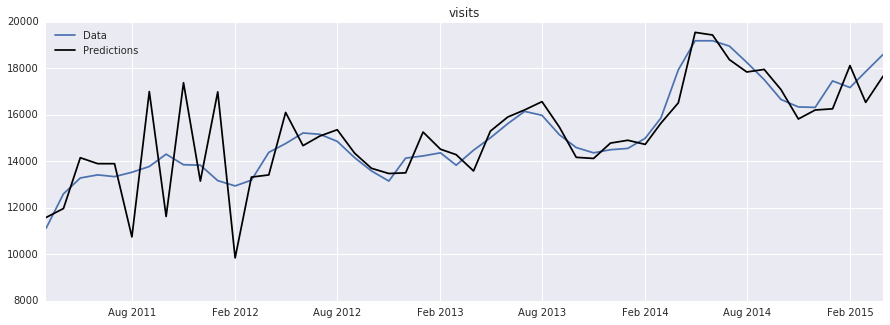

In [134]:
model.plot_predict_is(50,figsize=(15,5))

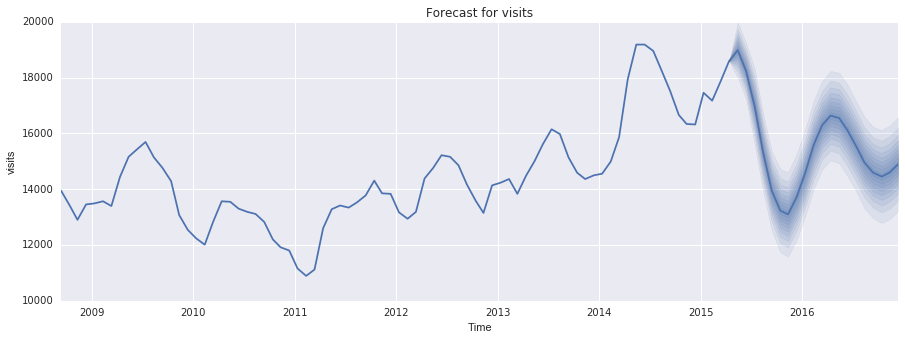

In [139]:
model.plot_predict(h=20,past_values=80,figsize=(15,5))

In [136]:
model.predict(h=20)

,visits
Month,
2015-05-14,18983.652764
2015-06-13,18233.456625
2015-07-14,16959.548920
2015-08-13,15332.398263
2015-09-13,13957.124865
2015-10-14,13233.370782
2015-11-11,13099.100011
2015-12-12,13719.722185
2016-01-11,14566.296995
